## Conclusion : Comparaison KNN / ANN / SVM

In [1]:
#imports
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from time import time
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [3]:
#load dataset
mnist = fetch_openml('mnist_784')

## [1] Echantillonage du jeu de données et séparation en entraînement/test

In [4]:
#choose sample size
dataset_length = len(mnist.data)
sample_size = 7000
sample_size = min(dataset_length,sample_size)

#extract sample from dataset
sample_indexes = np.random.randint(dataset_length, size= sample_size)
data, target = np.array([mnist.data[i] for i in sample_indexes]), np.array([mnist.target[i] for i in sample_indexes])

#extract train/test according to the proportion given in the subject
train_size = 70/100 #70% de test
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size, random_state = 42)

## [2] Paramétrage des modèles
Nous utilisons les meilleurs paramètres obtenus suite aux 3 analyses individuelles de ces méthodes

#### KNN

In [5]:
n_nb = 5
dist = 2
knn = KNeighborsClassifier(n_nb, p = dist, n_jobs = 1)

#### MLP

In [10]:
layers_nb = 6
layers_size = 50
up_size = 1.25 * layers_size
down_size = 0.75*layers_size
neurons = np.geomspace(up_size, down_size, num=layers_nb, dtype=int)#reduce neurons number logarithmically to ensure convergence
algo = 'lbfgs'
function = 'relu'
alpha = 0.1
mlp = MLPClassifier(hidden_layer_sizes=neurons, solver = algo, alpha = alpha, activation = function)

#### SVC

In [11]:
kernel = 'rbf'
c = 1.0
svc = SVC(kernel = kernel, C = c)

## [3] Analyse comparative
Pour cette analyse, nous comparerons les différentes modèles sur plusieurs critères :
- Précision
- Rappel
- Erreur
- Temps d'entraînement
- Temps de prédiction

In [12]:
methods = {"KNN":knn,"MLP":mlp,"SVC":svc}

In [19]:
plot = ([],[],[],[],[],[])
for name,clf in methods.items():
    train_start = time()
    clf.fit(d_train,l_train)
    train_duration = time()-train_start
    pred_start = time()
    prediction = clf.predict(d_test)
    pred_duration = time()-pred_start
    
    recall = metrics.recall_score(l_test, prediction, average = 'micro')
    score = metrics.precision_score(l_test, prediction, average='micro')
    error = metrics.zero_one_loss(l_test, prediction)
    
    plot[0].append(name)
    plot[1].append(100*score)
    plot[2].append(100*recall)
    plot[3].append(error)
    plot[4].append(train_duration)
    plot[5].append(pred_duration)

Text(0,0.5,'Error')

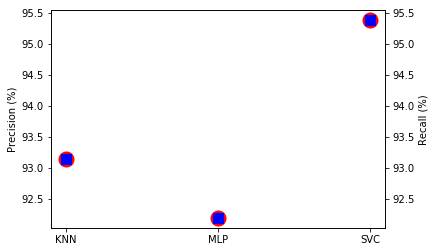

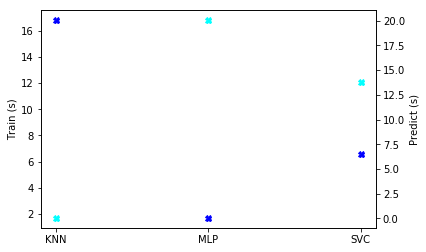

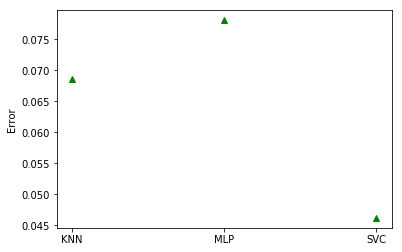

In [22]:
fig=plt.figure()
ax1=fig.add_subplot(111, label="precision")
ax2=ax1.twinx()

ax1.plot(plot[0],plot[1],linestyle='None',marker='o',ms=15.0,color='r')
ax1.set_ylabel("Precision (%)")
ax2.plot(plot[0],plot[2],linestyle='None',marker='s',ms=10,color='b')
ax2.set_ylabel("Recall (%)")

fig2 = plt.figure()
ax4 = fig2.add_subplot(111, label="time")
ax5=ax4.twinx()
ax4.plot(plot[0],plot[4],linestyle='None',marker='X',color='cyan')
ax4.set_ylabel("Train (s)")
ax5.plot(plot[0],plot[5]+plo,linestyle='None',marker='X',color='b')
ax5.set_ylabel("Predict (s)")

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, label="error")
ax3.plot(plot[0],plot[3],linestyle='None',marker='^',color='g')
ax3.set_ylabel("Error")